## Project 2 - Supervised Learning - A mix of Classification and Regression Model via Gradient Descent
### Due: Nov/19/2021 Frinday 11:59 PM

### Project Description
In the data, there are four columns - $x$, $y$, $z$, and class where $z$ is the continous target and the class categorizes each $z$. Knowing that $z$ is a function 

For each class $k$, $z_k$ is a sum of multiple exponential functions as shown below: 

$$z_k(x,y)=-C\Big[\Big(\sum_{n,m=1}^4\exp\big[{-\big((x+C_{kn})^2+(y+C_{km})^2\big)\big]}\Big)+\exp\big[-(x+C_{k})^2)\big]+\exp{\big[-(y+C_{k})^2\Big]}\big]$$
where $C$, $C_k$, $C_{km}$, and $C_{kn}$ are unkonwn constant where $C$ is the same for all $k$s. 

The goal is to build a model that predidicts $z$, $M(H,Z)$, where $M(H,Z)$ is the combination of classifier $H(x,y)$ and regression $Z(z_k(x,y))$ where $z_k(x,y)$ is a submodel for each $k$: 
$$Z(x,y,k)=Z(z_1,z_2,\cdots,z_k)$$
The workflow can summarize as following:
1. classify $k$ using $H$ and identify the class $k^*$.
2. predict $z$ using indiviual $z_k\in Z$.

$$x,y,k\implies H(x,y) \implies \text{output:} k^* \implies Z(z_k(x,y,k)) \text{for each k} \implies \text{output:} z^*$$

### Model Implementation

#### Classifier $H(x,y)$: [30 pts]

Using `sklearn`, build a classifier $H(x,y)$ to classify `class` $k$. 
- use logistic regression and SVM.
- report the accuracy of each classifier and choose one for $H$ with explanaitons. 
- predict $k$ using $H$.  

#### Regressions $Z(x,y,k)$: [30 pts]
Using `sklearn`, build $k$ many models that predicts $z$ for each $k$ and determine the constants, $C$, $C_k$, $C_{km}$ and $C_{kn}$, for each $z_k$. 
- ues linear regression and Gaussain Process.
- report the constants and room mean squared error (RMSE) for each aglorithm for each $k$. 
$$\text{RMSE}=\Big(\sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-z_i^*)^2}\Big)$$ 
where $z_i^*$ is the predicted value of $z_i$

#### M(H,Z) Evaluation [10 pts]
Build a function that predicts z using the learn from $H$. 
- report the overall RMSE. 

#### Gradient Descent [30 pts]
Using `numpy` and `pandas`, implement the a gradient descent function to estimate the constants for each $z_k$ using MSE:

$$\text{Mean Square Error (MSE)} = \frac{1}{2}\sum_{i=1}^n(z_i-z_i^*)^2$$
- determine constants, $C$, $C_k$, $C_{km}$, and $C_{kn}$, for each $k$
- test which learning rate $\eta$ terminates faster when the acceptance error $\epsilon$ is $\epsilon\le0.005$ and the learning rate $\eta$ is $[10^{-2},10^{-3},10^{-4}$]. If the given $\eta$ is not sufficient, then test with different $\eta$. 
- present the true model $Z_k$.
- predict $z$ and report RMSE. Do for each $k$ and overall. 

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#%matplotlib notebook
df = pd.read_csv('F21_CS559_Project2.csv')

#fig = plt.figure()
#ax = Axes3D(fig)
#ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.2)
#plt.show()

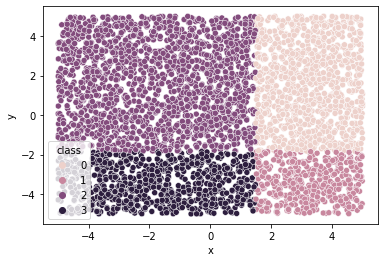

In [119]:
import seaborn as sns

def plot_2D(df,comp1,comp2,target):
    sns.scatterplot(x=comp1,y=comp2,data=df,hue=target)
def plot_3D(df, comp1,comp2,comp3,target):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[comp1],df[comp2],df[comp3],c=df[target])
    ax.set_xlabel(comp1)
    ax.set_ylabel(comp2)
    ax.set_zlabel(comp3)
    plt.show()
plot_2D(df,'x', 'y','class')

In [120]:
from sklearn import linear_model
log_reg = linear_model.LogisticRegression()
X = df
X = X.drop('z', 1)
X = X.drop('class', 1)
y = df['class']


log_reg.fit(X, y)
print(log_reg.score(X, y))

0.99625


In [121]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear')

svm_model.fit(X,y)
svm_model.score(X, y) # accuracy

0.9955

In [122]:
k = svm_model.predict(X)
print(k)

[3 2 3 ... 0 2 3]


In [123]:
# Create linear regression object
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C



linear_models = []
rmse_lin = []
print("Linear Regression")
for k in [0,1,2,3]:
    # Train the model using the training sets
    kdf = df.loc[df['class'] == k]
    X_k = kdf
    X_k = X_k.drop('z',1)
    X_k = X_k.drop('class',1)
    y_k = kdf['z']

    regr = linear_model.LinearRegression()
    regr.fit(X_k, y_k)
    linear_models.append(regr)
    pred = regr.predict(X_k)
    rmse_lin.append(mean_squared_error(y_k, pred, squared=False))
    print(f"Class: {k}. Coeffs: {regr.coef_}. Intercept: {regr.intercept_}. RMSE: {rmse_lin[k]}")

gp_models = []
rmse_gp = []
print("Gaussian Process")
for k in [0,1,2,3]:
    # Train the model using the training sets
    kdf = df.loc[df['class'] == k]
    X_k = kdf
    X_k = X_k.drop('z',1)
    X_k = X_k.drop('class',1)
    y_k = kdf['z']

    gp = GaussianProcessRegressor()
    gp.fit(X_k, y_k)
    gp_models.append(gp)
    pred = gp.predict(X_k)
    pred2 = gp.predict(X_k.head(5))
    rmse_gp.append(mean_squared_error(y_k, pred, squared=False))
    print(f"Class: {k}. RMSE: {rmse_gp[k]}")


Linear Regression
Class: 0. Coeffs: [ 0.24877525 -0.07091994]. Intercept: -1.0125197887369342. RMSE: 0.5739993912186738
Class: 1. Coeffs: [-0.05619825  0.01461113]. Intercept: -0.5998021353761839. RMSE: 0.37318551182450854
Class: 2. Coeffs: [-0.19549992  0.06686227]. Intercept: -0.9050579290857808. RMSE: 0.6679465744923827
Class: 3. Coeffs: [-0.04334389 -0.1387291 ]. Intercept: -0.14528773859152722. RMSE: 0.3052033205865178
Gaussian Process
Class: 0. RMSE: 3.479732021368377e-07
Class: 1. RMSE: 4.12909810826969e-07
Class: 2. RMSE: 3.5816690670896735e-07
Class: 3. RMSE: 2.8590847447021294e-07


In [136]:
df.head()

,x,y,z,class,H
0,-3.568946,-4.278083,0.652272,3,3
1,-1.763717,4.610501,0.273142,2,2
2,-0.078206,-4.055818,0.650066,3,3
3,2.871863,1.321761,-0.786556,0,0
4,-4.637322,-1.346959,0.272564,2,2


In [130]:
H = svm_model.predict(X)
hdf = df
hdf['H'] = H
X.head(10)

,x,y
0,-3.568946,-4.278083
1,-1.763717,4.610501
2,-0.078206,-4.055818
3,2.871863,1.321761
4,-4.637322,-1.346959
5,3.631828,1.577494
6,4.048218,1.589549
7,1.044778,-0.920096
8,4.639253,4.800450
9,1.590705,-2.337836


In [138]:
#Combine H and Z, report RMSE
H = svm_model.predict(X)
hdf = df
hdf['H'] = H
hdf.head(10)

Z_star = []
#for k in [0,1,2,3]:
#ddd = df.loc[df['class'] == 0]
#XXX = ddd.drop(columns=['H', 'z', 'class'], axis=1)
#print(XXX.head(1))
gp_models[0].predict(X.head(1))
for index, row in hdf.iterrows():
    X_row = hdf.iloc[[index]]
    X_row = X_row.drop(columns=['H', 'z', 'class'], axis=1)
    model_k = int(row['H'])
    z_pred = gp_models[model_k].predict(X_row)
    Z_star.append(z_pred[0])
hdf['Z_star'] = Z_star
hdf.head()

,x,y,z,class,H,Z_star
0,-3.568946,-4.278083,0.652272,3,3,0.652272
1,-1.763717,4.610501,0.273142,2,2,0.273142
2,-0.078206,-4.055818,0.650066,3,3,0.650065
3,2.871863,1.321761,-0.786556,0,0,-0.786556
4,-4.637322,-1.346959,0.272564,2,2,0.272564


In [140]:
rmse_total = mean_squared_error(hdf['z'], hdf['Z_star'], squared=False)
print(f"RMSE total: {rmse_total}")

RMSE total: 0.07460012516918486


In [ ]:
def my_grad(X,Y,Z):
    w1 = 0.0; w2=0.0; eta=0.1 #.01,.001
    gradient_w1=0; gradient_w2=0
    for i in range(0,10000):
        y = w1*X**2+w2*X
        error = (Y-y)
        gradient_w1 = np.mean(-X**2*error)
        gradient_w2 = np.mean(-X*error)
        w1 = w1-eta*gradient_w1
        w2 = w2-eta*gradient_w2
        if np.mean(error**2)<=0.005:
            print(w1,w2,np.mean(error**2)/2)
            break
    return w1, w2